Расчет количества побед и поражений каждой команды

In [23]:
import pandas  as pd
# Создаем датафрейм из исходного файла базы данных Match
df = pd.read_csv('Match.csv')

# Создаем две новые колонки для результатов матчей cо значениями True и False
df['home_win'] = df['home_team_goal'] > df['away_team_goal']
df['away_win'] = df['away_team_goal'] > df['home_team_goal']
display(df)
# Создаем  словари для подсчета побед и поражений
wins = {}
losses = {}

# Обрабатываем результаты матчей
for index, row in df.iterrows():
    home_team_id = row['home_team_api_id']
    away_team_id = row['away_team_api_id']
    
# Подсчет побед
    if row['home_win']:
# Победа для домашней команды
        wins[home_team_id] = wins.get(home_team_id, 0) + 1
        losses[away_team_id] = losses.get(away_team_id, 0) + 1
    elif row['away_win']:
# Победа для гостевой команды
        wins[away_team_id] = wins.get(away_team_id, 0) + 1
        losses[home_team_id] = losses.get(home_team_id, 0) + 1

# Преобразуем в DataFrame для удобства
results = pd.DataFrame({
    'team_api_id': list(set(wins.keys()).union(set(losses.keys()))),
    'wins': [wins.get(team_id, 0) for team_id in list(set(wins.keys()).union(set(losses.keys())))],
    'losses': [losses.get(team_id, 0) for team_id in list(set(wins.keys()).union(set(losses.keys())))]
})

display(results)


,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,home_win,away_win
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20,False,False
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60,False,False
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75,False,True
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50,True,False
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False
25975,25976,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True
25976,25977,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False
25977,25978,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False


,team_api_id,wins,losses
0,10242,11,43
1,8194,7,18
2,10243,120,97
3,8197,34,22
4,10249,110,89
...,...,...,...
294,4087,45,71
295,10233,106,117
296,10235,139,70
297,10238,58,125


Создадим параметр rating, который равен разности между количеством побед и поражений каждой команды за все время. 
Он будет являться статистическим показателем успешности команды.

In [2]:
results['rating']=results['wins']-results['losses']
# Сортируем команды в порядке убывания рейтинга
results=results.sort_values(by=['rating'], ascending=False)
results.head(5)    

,team_api_id,wins,losses,rating
119,8634,234,27,207
118,8633,228,40,188
222,9925,218,36,182
155,9773,183,23,160
154,9772,185,27,158


Создание тепловой карты параметров команд

In [3]:
#Создаем датафрейм харакреристик команды из исходного файла базы данных Team_Attributes
teams=pd.read_csv('Team_Attributes.csv')
display(teams.head(2))


,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover


In [4]:
#Добавляем в датафрейм поле rating по соответствующему team_api_id
teams=pd.merge(teams, results, on='team_api_id', how='left')
teams.head(1)

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,wins,losses,rating
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,50,Medium,55,Press,45,Normal,Cover,35,75,-40


In [5]:
#Создаем датафрейм, содержащий только числовые значения
teams_numeric = teams.drop(columns=['id','team_api_id','team_fifa_api_id','date','buildUpPlaySpeedClass','buildUpPlayDribblingClass','buildUpPlayPassingClass',
'buildUpPlayPositioningClass','chanceCreationPassingClass','chanceCreationCrossingClass','chanceCreationShootingClass','chanceCreationPositioningClass',
'defencePressureClass','defenceAggressionClass','defenceTeamWidthClass','defenceDefenderLineClass','wins','losses'])
teams_numeric.head(2)

,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth,rating
0,60,NaN,50,60,65,55,50,55,45,-40
1,52,48.0,56,54,63,64,47,44,54,-40


In [6]:
#Создаем корреляцию
corr_matrix_teams = teams_numeric.corr()
corr_matrix_teams

,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth,rating
buildUpPlaySpeed,1.000000,0.067988,0.395506,0.319162,0.191687,0.072098,0.046397,0.160569,0.067019,-0.005866
buildUpPlayDribbling,0.067988,1.000000,-0.123613,0.080242,0.055541,0.120051,-0.017749,-0.035893,0.085702,0.032271
buildUpPlayPassing,0.395506,-0.123613,1.000000,0.220367,0.231088,-0.077325,-0.050487,0.122451,0.063150,-0.196326
chanceCreationPassing,0.319162,0.080242,0.220367,1.000000,0.246528,0.112497,0.203158,0.145212,0.150143,0.065916
chanceCreationCrossing,0.191687,0.055541,0.231088,0.246528,1.000000,-0.012576,0.087108,0.098874,0.131515,0.055264
chanceCreationShooting,0.072098,0.120051,-0.077325,0.112497,-0.012576,1.000000,0.185603,0.116578,0.129166,0.125205
defencePressure,0.046397,-0.017749,-0.050487,0.203158,0.087108,0.185603,1.000000,0.422493,0.508464,0.234323
defenceAggression,0.160569,-0.035893,0.122451,0.145212,0.098874,0.116578,0.422493,1.000000,0.243189,0.111587
defenceTeamWidth,0.067019,0.085702,0.063150,0.150143,0.131515,0.129166,0.508464,0.243189,1.000000,0.092364
rating,-0.005866,0.032271,-0.196326,0.065916,0.055264,0.125205,0.234323,0.111587,0.092364,1.000000


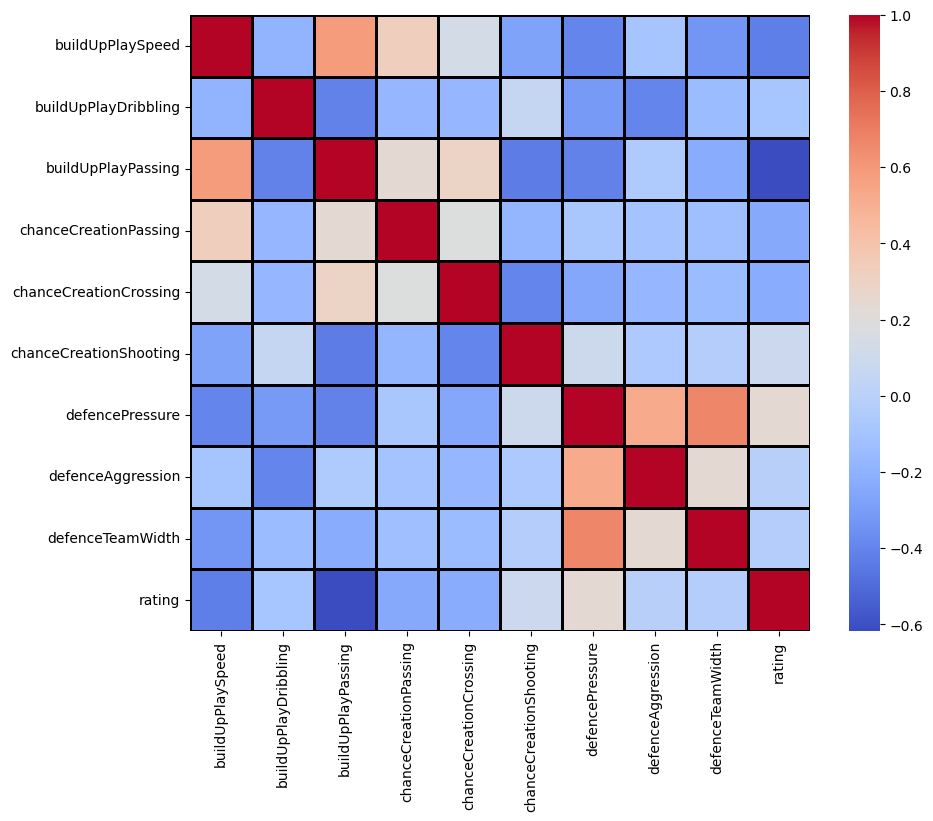

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
#Создаем тепловую карту
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_teams.corr(), cmap= 'coolwarm', linecolor = 'black', linewidths=1);

Исходя из тепловой карты видно, что существенной корреляции между параметром rating и остальными параметрами нет.

Создание тепловой карты параметров игроков

In [8]:
#Создаем датафрейм,воспользовавшись файлом H_players, в котором собраны параметры игроков, играющих на своем поле
h_players=pd.read_excel('H_players.xlsx')
display(h_players.head(1))


,rating,home_team_api_id,home_team_goal,h_weight,h_height,h_age,h_overall_rating,h_potential,h_crossing,h_finishing,...,h_vision,h_penalties,h_marking,h_standing_tackle,h_sliding_tackle,h_gk_diving,h_gk_handling,h_gk_kicking,h_gk_positioning,h_gk_reflexes
0,207,8633,0,166.818182,181.956364,27.090909,85.181818,87.545455,68.636364,65.181818,...,74.454545,66.636364,50.363636,57.636364,53.454545,18.181818,16.363636,16.818182,15.818182,17.0


In [9]:
#Удаляем лишний столбец и создаем корреляцию
h_players_numeric =h_players.drop(columns=['home_team_api_id'])
corr_matrix_h_players = h_players_numeric.corr()

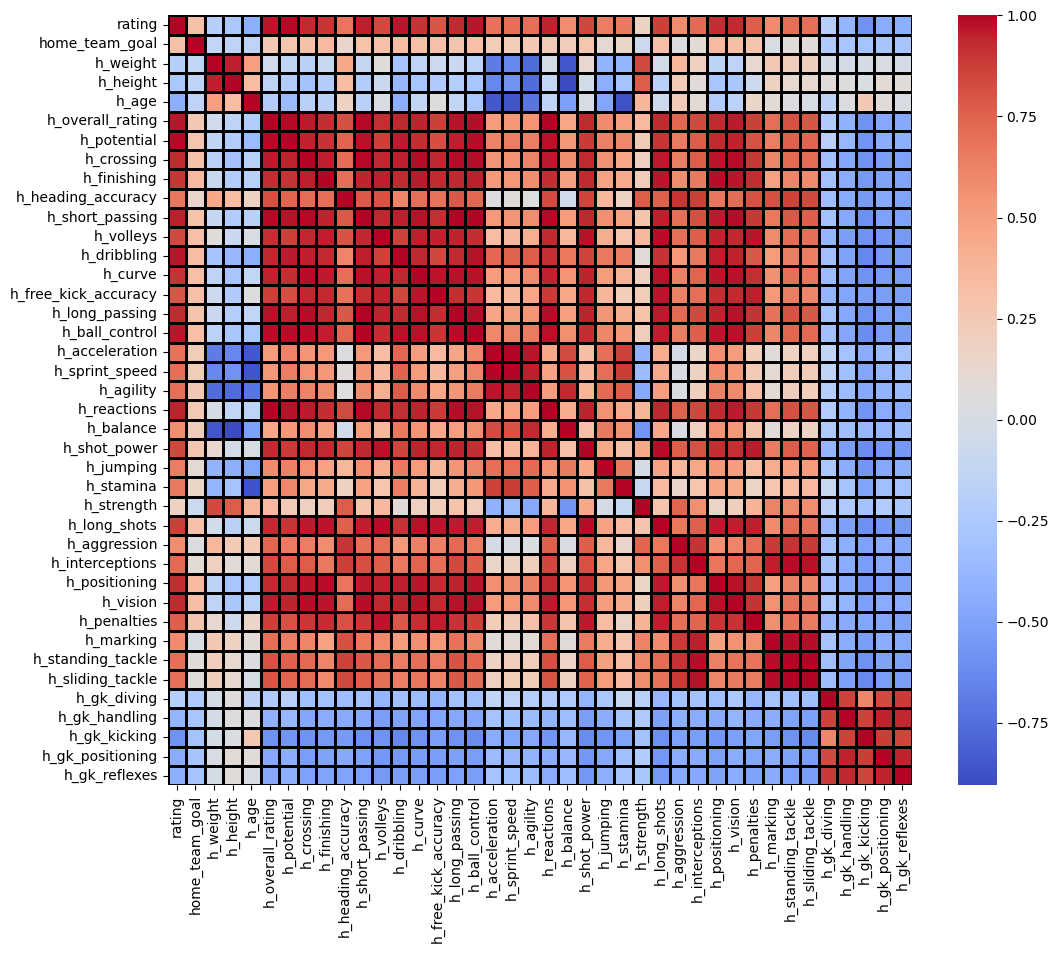

In [10]:
#Создаем тепловую карту
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_h_players.corr(), cmap= 'coolwarm', linecolor = 'black', linewidths=1);

In [11]:
#Создаем датафрейм,воспользовавшись файлом A_players, в котором собраны параметры игроков, играющих на гостевом поле
a_players=pd.read_excel('A_players.xlsx')
display(a_players.head(1))


,rating,away_team_api_id,home_team_goal,away_team_goal,a_weight,a_height,a_age,a_overall_rating,a_potential,a_crossing,...,a_vision,a_penalties,a_marking,a_standing_tackle,a_sliding_tackle,a_gk_diving,a_gk_handling,a_gk_kicking,a_gk_positioning,a_gk_reflexes
0,1,1601,0,1,165.090909,181.956364,28.818182,63.181818,66.727273,51.727273,...,52.909091,49.090909,45.272727,45.727273,45.818182,15.909091,16.272727,14.272727,15.363636,16.363636


In [12]:
#Удаляем лишний столбец и создаем корреляцию
a_players_numeric =a_players.drop(columns=['away_team_api_id'])
corr_matrix_a_players = a_players_numeric.corr()

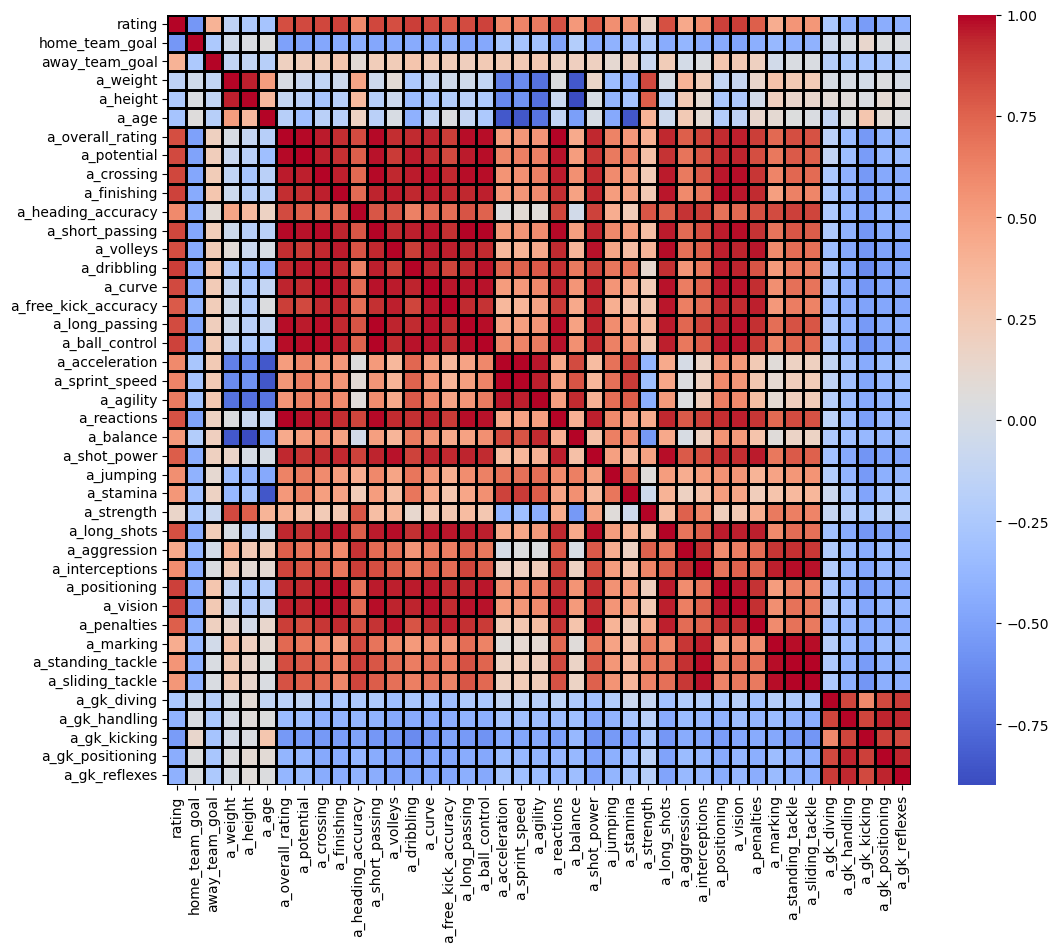

In [13]:
#Создаем тепловую карту
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_a_players.corr(), cmap= 'coolwarm', linecolor = 'black', linewidths=1);

По картам видно сильную корреляцию статистического параметра rating и такими параметрами игроков, как potential, crossing, finishing, short_passing, dribbling, curve,
long_passing, ball_control, reactions, shot_power, long_shots, positioning, vision. 
Эти показатели входят в комплексный параметр overall_rating, который также сильно коррелируется с показателем успешности команды - rating. 
Отсюда можно сделать вывод, что overall_rating можно использовать для дашборда.

Расчет соотношения побед домашних и гостевых команд

In [25]:
# Инициализация счётчиков побед
home_wins = 0
away_wins = 0
draws = 0

# Обрабатываем результаты матчей
for index, row in df.iterrows():
    if row['home_team_goal'] > row['away_team_goal']:
        home_wins += 1  # Победа домашней команды
    elif row['away_team_goal'] > row['home_team_goal']:
        away_wins += 1  # Победа гостевой команды
    else:
        draws += 1  # Ничья

# Выводим результаты
print(f"Количество побед домашних команд: {home_wins}")
print(f"Количество побед гостевых команд: {away_wins}")
print(f"Количество ничьих: {draws}")

# Рассчитываем соотношение
total_matches = home_wins + away_wins + draws

if total_matches > 0:
    home_win_ratio = home_wins / total_matches * 100
    away_win_ratio = away_wins / total_matches * 100
    draw_ratio = draws / total_matches * 100

    print(f"Соотношение побед домашних команд: {home_win_ratio:.2f}%")
    print(f"Соотношение побед гостевых команд: {away_win_ratio:.2f}%")
    print(f"Соотношение ничьих: {draw_ratio:.2f}%")
else:
    print("Нет доступных матчей для анализа.")

Количество побед домашних команд: 11917
Количество побед гостевых команд: 7466
Количество ничьих: 6596
Соотношение побед домашних команд: 45.87%
Соотношение побед гостевых команд: 28.74%
Соотношение ничьих: 25.39%


Этот коэффициент можно использовать в дашборде

In [ ]:
Анализ коэффициентов букмекеров для прогноза побед и поражений команд

In [ ]:
# Используем логистическую регрессию
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
# Добавление целевой переменной
def determine_outcome(row):
    if row['home_team_goal'] > row['away_team_goal']:
        return 1  
# Победа домашней команды
    elif row['home_team_goal'] < row['away_team_goal']:
        return -1  
# Победа гостевой команды
    else:
        return 0  
# Ничья
df['outcome'] = df.apply(determine_outcome, axis=1)
# Список признаков 
features = [
    'B365H', 'B365D', 'B365A',  # Коэффициенты букмекеров
    'BWH', 'BWD', 'BWA',
    'IWH', 'IWD', 'IWA',
    'LBH', 'LBD', 'LBA',
    'PSH', 'PSD', 'PSA',
    'WHH', 'WHD', 'WHA',
    'SJH', 'SJD', 'SJA',
    'VCH', 'VCD', 'VCA'
    '
]

X = df[features]
y = df['outcome']

# Разделите данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели логистической регрессии
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

# Прогнозирование
y_pred = model.predict(X_test)

# Оценка модели
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Прогнозирование для новых матчей
# new_matches = ...  # ваш DataFrame с новыми данными
# probabilities = model.predict_proba(new_matches[features])

In [ ]:
 !jupyter nbconvert  Project_3_1.ipynb --to html